In [1]:
from data import Dataloader
from utils import *
from plotting import *

In [2]:
%matplotlib inline

## Load Data

In [3]:
data_path = 'Crimes_-_2001_to_Present.csv'
crime_loader = Dataloader(data_path)

Max Date:  2021-12-31 00:55:00
Min Date:  2021-12-31 00:55:00
Types of Unique Crimes:  36


In [4]:
# Subset data
chosen_crimes = ['BATTERY','ASSAULT','THEFT']

date_max = pd.to_datetime('2019-11-30')
date_min = pd.to_datetime('2017-11-30')

crime_loader.subset_data_crime(chosen_crimes,
                         date_min,
                         date_max,
                         del_full=True)

crime_loader.clean_data()
confirmed_crimes = crime_loader.crimes_geo


/Users/tzehongti/Desktop/Duke /STA 571/project/data.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['Date'] = pd.to_datetime(subset_data['Date'])


No. NA:  2375


### Plotting Overall Map of Chicago

/Users/tzehongti/miniforge3/envs/sta_571/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


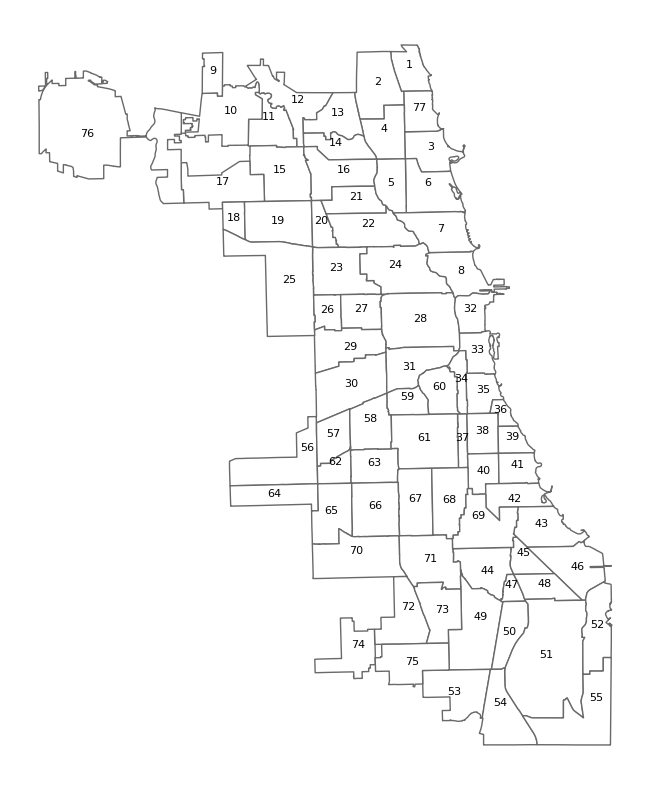

In [5]:
shp_file_path = 'Data/Geospatial/Boundaries - Community Areas/geo_export_cba5a572-5539-4277-8bb0-4f93bd8aa8fd.shp'

crime_loader.map_import(shp_file_path, fig_size=(10,10))
df_communities = crime_loader.df_communities

We take only a subset of the areas associated with the southside

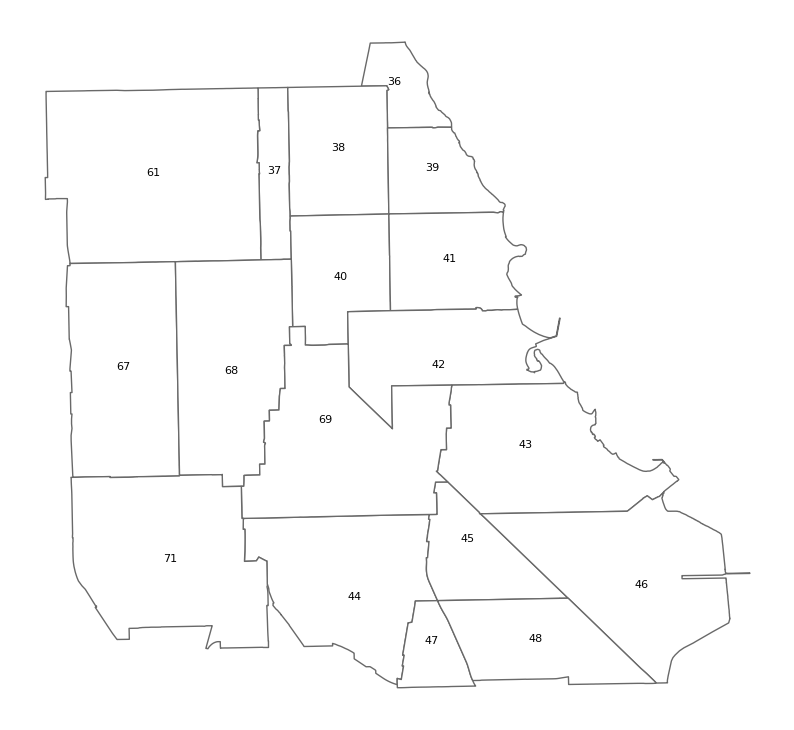

In [6]:
#subset_cas = [25, 23, 24, 8,32,28,27,26,29]

subset_cas = [61,67,68,37,38,36,39,40,41,42,69,43,45,46,48,47,44,71]
crime_loader.subset_map(subset_cas)
subset_df_communities = crime_loader.subset_df_communiies

# Subset crime by geo-spatial area
crime_loader.subset_data_geo()
crimes_geo_subset = crime_loader.crimes_geo_subset

Since we are modelling rates, the number of people in a district is also important

In [7]:
chicago_popsizes = pd.read_csv('Data/chicago_popsize.csv')

In [8]:
chicago_popsizes['Population Size'] = chicago_popsizes['Population Size'].apply(lambda x: x.replace(',',''))

In [9]:
chicago_popsizes.head()

Community Areas  Community Name Population Size  Area_sqm  Area_sqkm  \
0                1     Rogers Park           55628      1.84       4.77   
1                2      West Ridge           77122      3.53       9.14   
2                3          Uptown           57182      2.32       6.01   
3                4  Lincoln Square           40494      2.56       6.63   
4                5    North Center           35114      2.05       5.31   

  Density_sqm Density_kmsq  
0   30,232.61    11,672.81  
1   21,847.59     8,435.36  
2   24,647.41     9,516.37  
3   15,817.97     6,107.32  
4   17,128.78     6,613.42

## Example Plot
- As an example we show the map of crime in the entire chicago in 2019 Q2

In [10]:
confirmed_crimes.head()

Primary Type        Date  Community Areas   Latitude  Longitude  \
235        THEFT  2019-10-13             24.0  41.895732 -87.687784   
447        THEFT  2019-10-05             28.0  41.882002 -87.662287   
555      ASSAULT  2019-10-13              3.0  41.975838 -87.659854   
607        THEFT  2019-10-13             28.0  41.877822 -87.655181   
686      BATTERY  2019-10-13             42.0  41.777822 -87.614353   

                       geometry  
235  POINT (-87.68778 41.89573)  
447  POINT (-87.66229 41.88200)  
555  POINT (-87.65985 41.97584)  
607  POINT (-87.65518 41.87782)  
686  POINT (-87.61435 41.77782)

/Users/tzehongti/Desktop/Duke /STA 571/project/plotting.py:27: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  chloro_data_sub = chloro_map_data[(chloro_map_data['Date'] > sub_date_min) &
/Users/tzehongti/Desktop/Duke /STA 571/project/plotting.py:28: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  (chloro_map_data['Date'] < sub_date_max) &
/Users/tzehongti/Desktop/Duke /STA 571/project/plotting.py:27: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.T

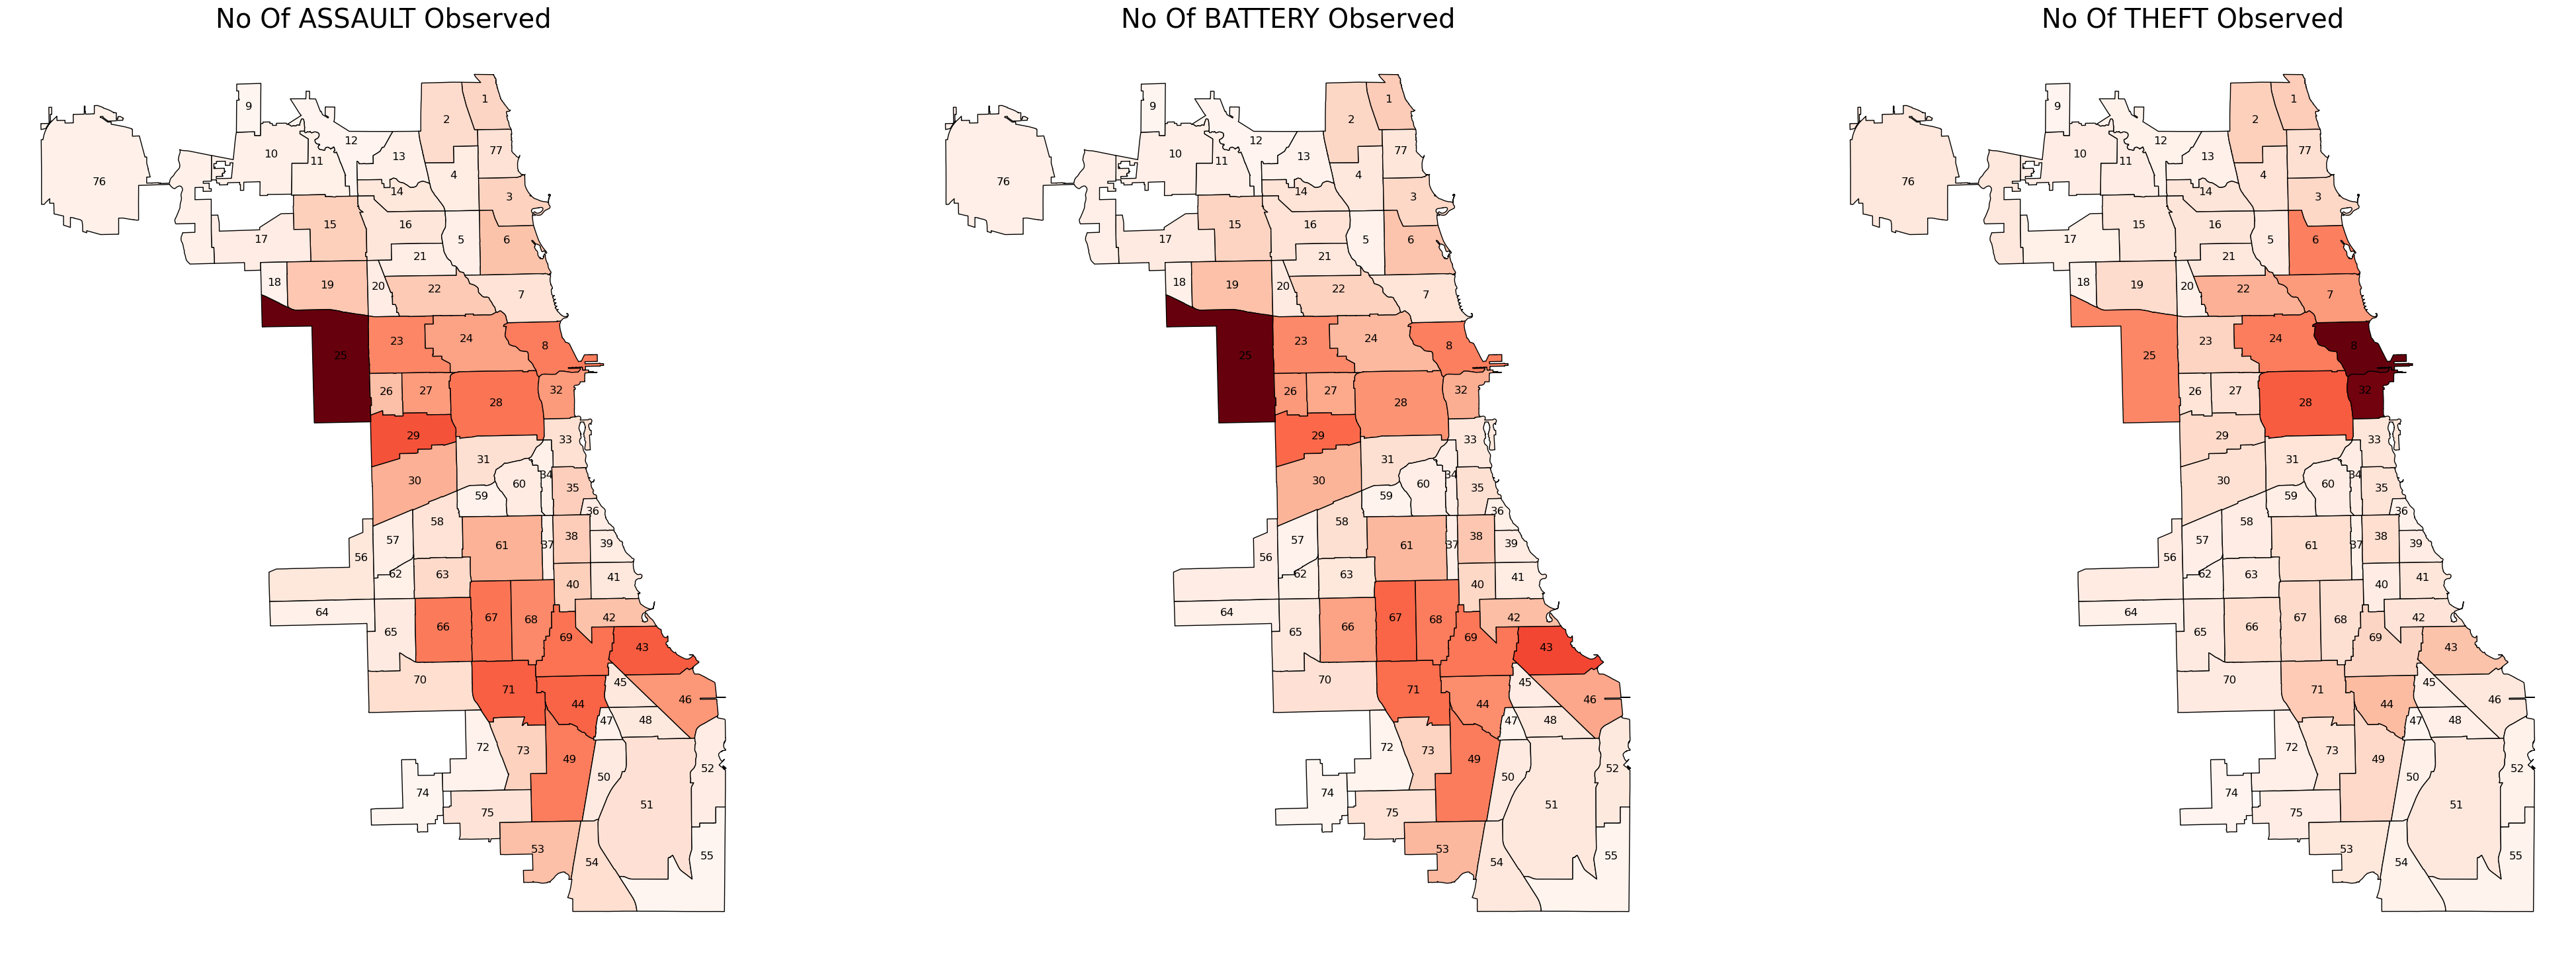

In [11]:
crime_types = ['ASSAULT','BATTERY','THEFT']
sub_date_min = pd.Timestamp('2019-03-30')
sub_date_max = pd.Timestamp('2019-06-30')

plot_crime_by_district(confirmed_crimes,
                       df_communities,
                       crime_types,
                       sub_date_min,
                       sub_date_max)

Extracting only the Southside area, we have:

/Users/tzehongti/Desktop/Duke /STA 571/project/plotting.py:27: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  chloro_data_sub = chloro_map_data[(chloro_map_data['Date'] > sub_date_min) &
/Users/tzehongti/Desktop/Duke /STA 571/project/plotting.py:28: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  (chloro_map_data['Date'] < sub_date_max) &
/Users/tzehongti/Desktop/Duke /STA 571/project/plotting.py:27: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.T

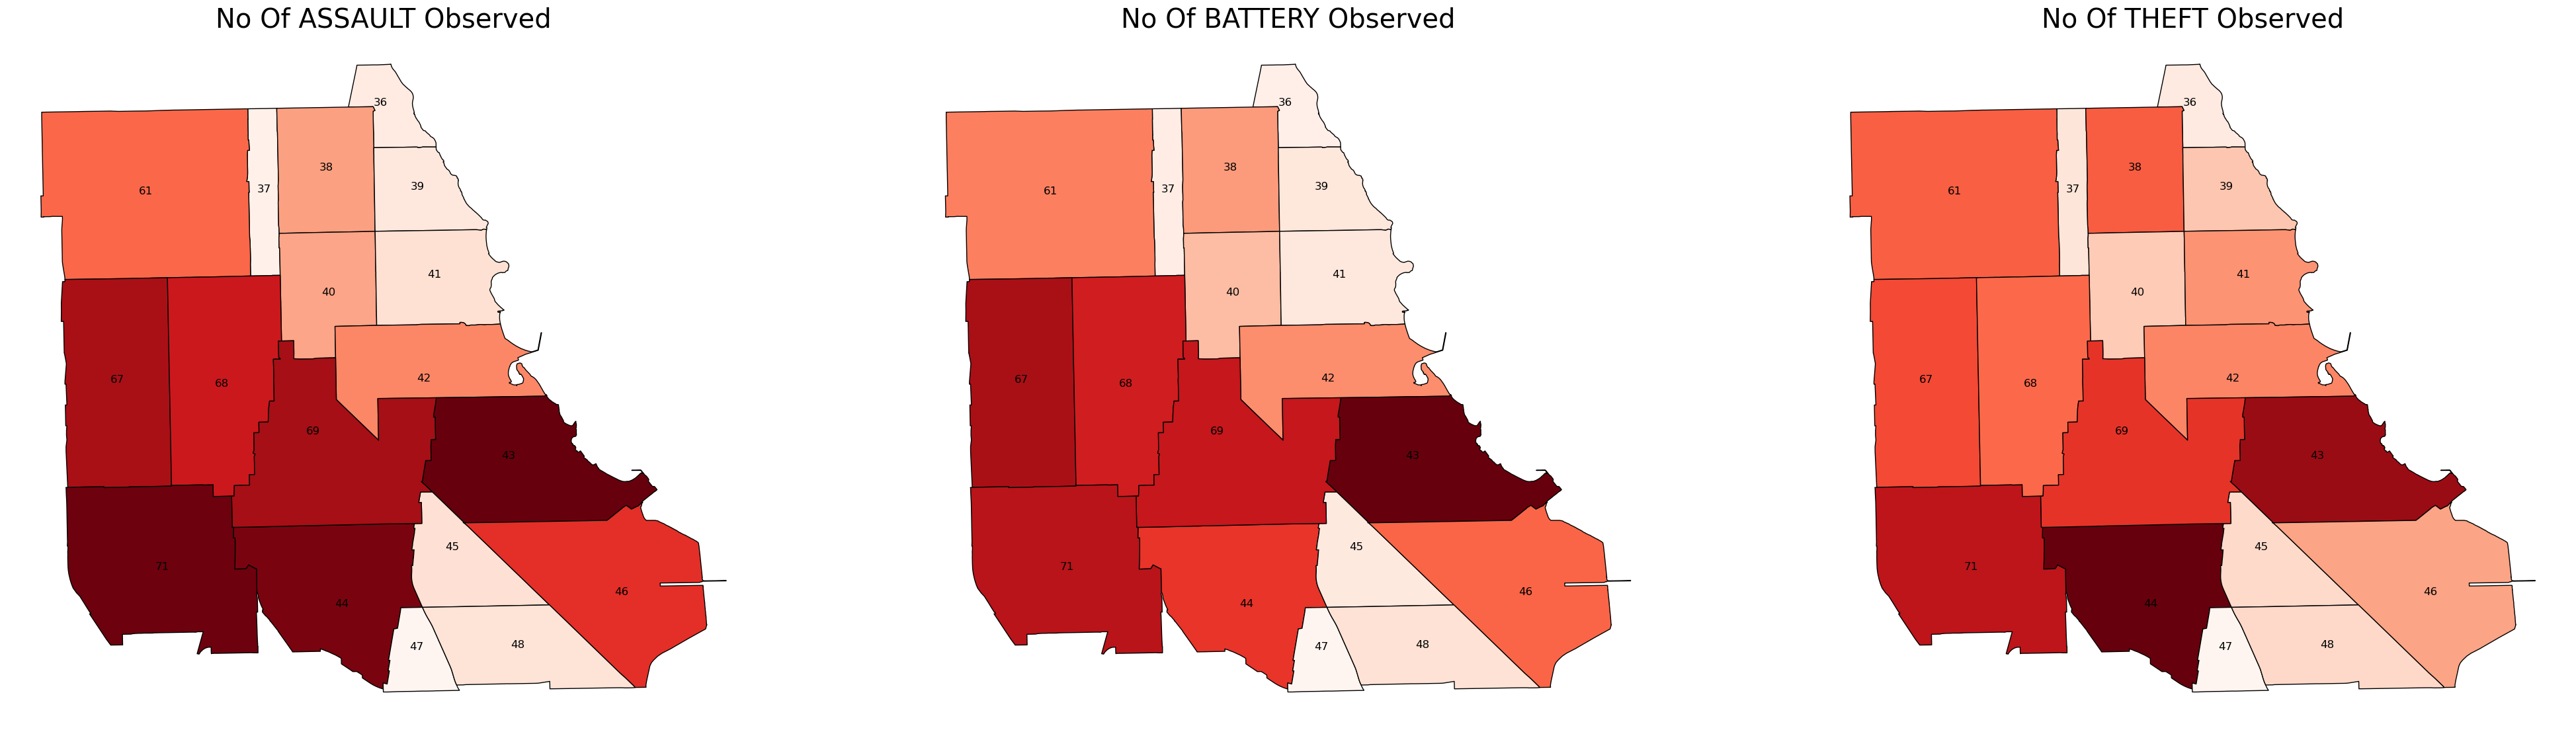

In [12]:
plot_crime_by_district(confirmed_crimes,
                       subset_df_communities,
                       crime_types,
                       sub_date_min,
                       sub_date_max)

## Next Point Process Visualization
- For our model we will not aggregate data points over the fixed spatial area, but instead try to model as a point process.
- First we visualize each individual events as points on the map

In [13]:
confirmed_crimes = crime_loader.crimes_geo


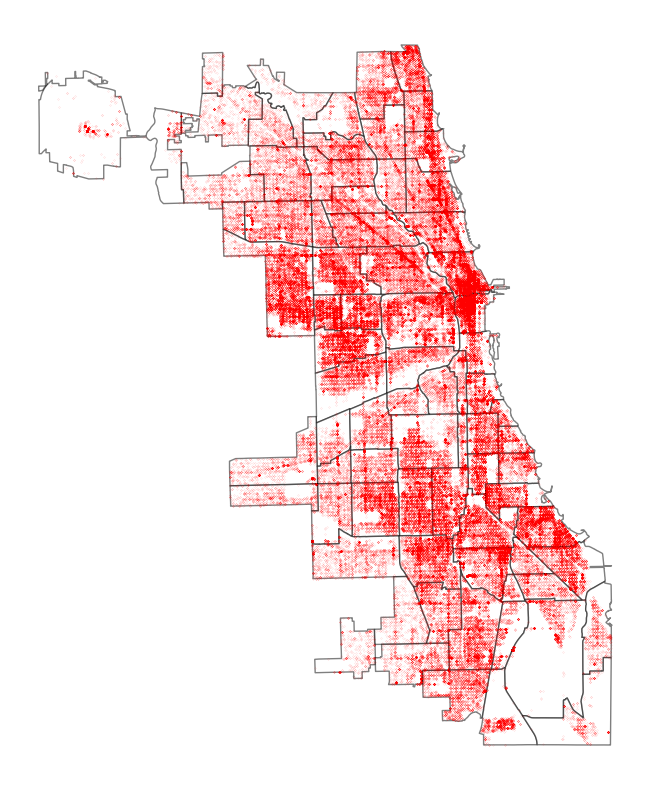

In [14]:
plot_point_data(df_communities,
                confirmed_crimes)

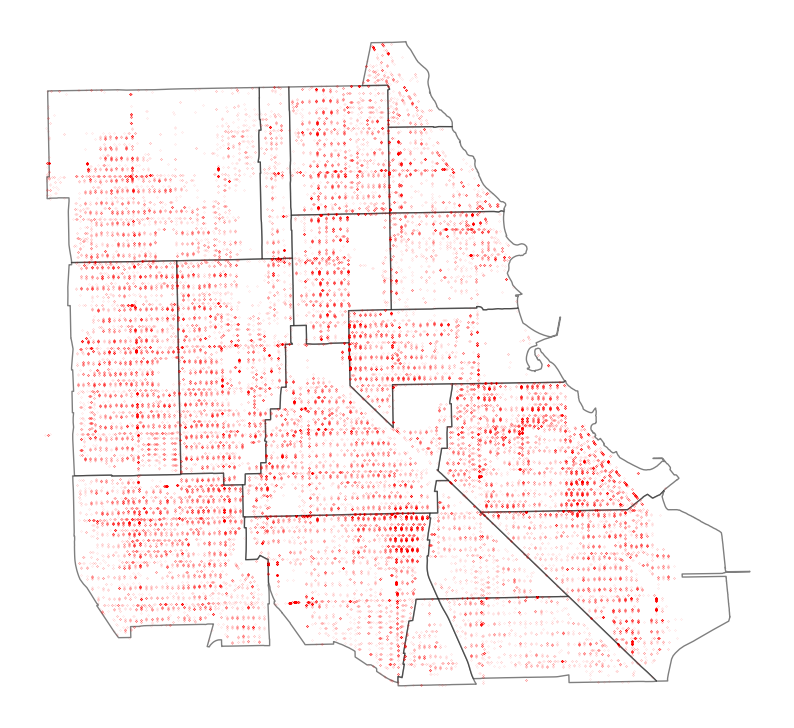

In [15]:
plot_point_data(subset_df_communities,
                crimes_geo_subset,
                markersize=2)

## Computational Grid

In [16]:
lon_min, lat_min, lon_max, lat_max = crimes_geo_subset.total_bounds


In [17]:
crimes_geo_subset

Primary Type        Date  Community Areas   Latitude  Longitude  \
686          BATTERY  2019-10-13             42.0  41.777822 -87.614353   
868          BATTERY  2019-10-13             69.0  41.776038 -87.615520   
2037         BATTERY  2019-10-13             44.0  41.750895 -87.599111   
2168         BATTERY  2019-10-13             44.0  41.748664 -87.605165   
2748           THEFT  2019-10-13             71.0  41.754780 -87.657083   
...              ...         ...              ...        ...        ...   
7473776      ASSAULT  2018-02-05             38.0  41.818005 -87.609219   
7473858      BATTERY  2019-05-15             71.0  41.736030 -87.646702   
7475774      BATTERY  2019-05-12             68.0  41.759409 -87.643044   
7477294      BATTERY  2019-05-26             43.0  41.759402 -87.588385   
7485802      ASSAULT  2018-09-27             69.0  41.777709 -87.615564   

                           geometry  
686      POINT (-87.61435 41.77782)  
868      POINT (-87.61552 41.77604)  
2037     POINT (-87.59911 41.75090)  
2168     POINT (-87.60516 41.74866)  
2748     POINT (-87.65708 41.75478)  
...                             ...  
7473776  POINT (-87.60922 41.81800)  
7473858  POINT (-87.64670 41.73603)  
7475774  POINT (-87.64304 41.75941)  
7477294  POINT (-87.58839 41.75940)  
7485802  POINT (-87.61556 41.77771)  

[67090 rows x 6 columns]

In [18]:
lon_min, lat_min, lon_max, lat_max = crimes_geo_subset.total_bounds
print('lon_min: ', lon_min)
print('lon_max: ', lon_max)
print('lat_min: ', lat_min)
print('lat_max: ', lat_max)


lon_min:  -87.684807529
lon_max:  -87.540189068
lat_min:  41.722054243
lat_max:  41.83121268


In [19]:
lon_min= -87.684807529  # Horizontal
lat_min= 41.72  # Vertical

# Specify number of cells
horz_cells = 19
vert_cells = 13

# Cell size
cell_size = 0.009

comp_grid = create_comp_grid(lon_min=lon_min,
                             lat_min=lat_min,
                             horz_cells=horz_cells,
                             vert_cells=vert_cells,
                             cell_size=cell_size)

In [20]:
print("No Grid Cells: ", len(comp_grid))

No Grid Cells:  247


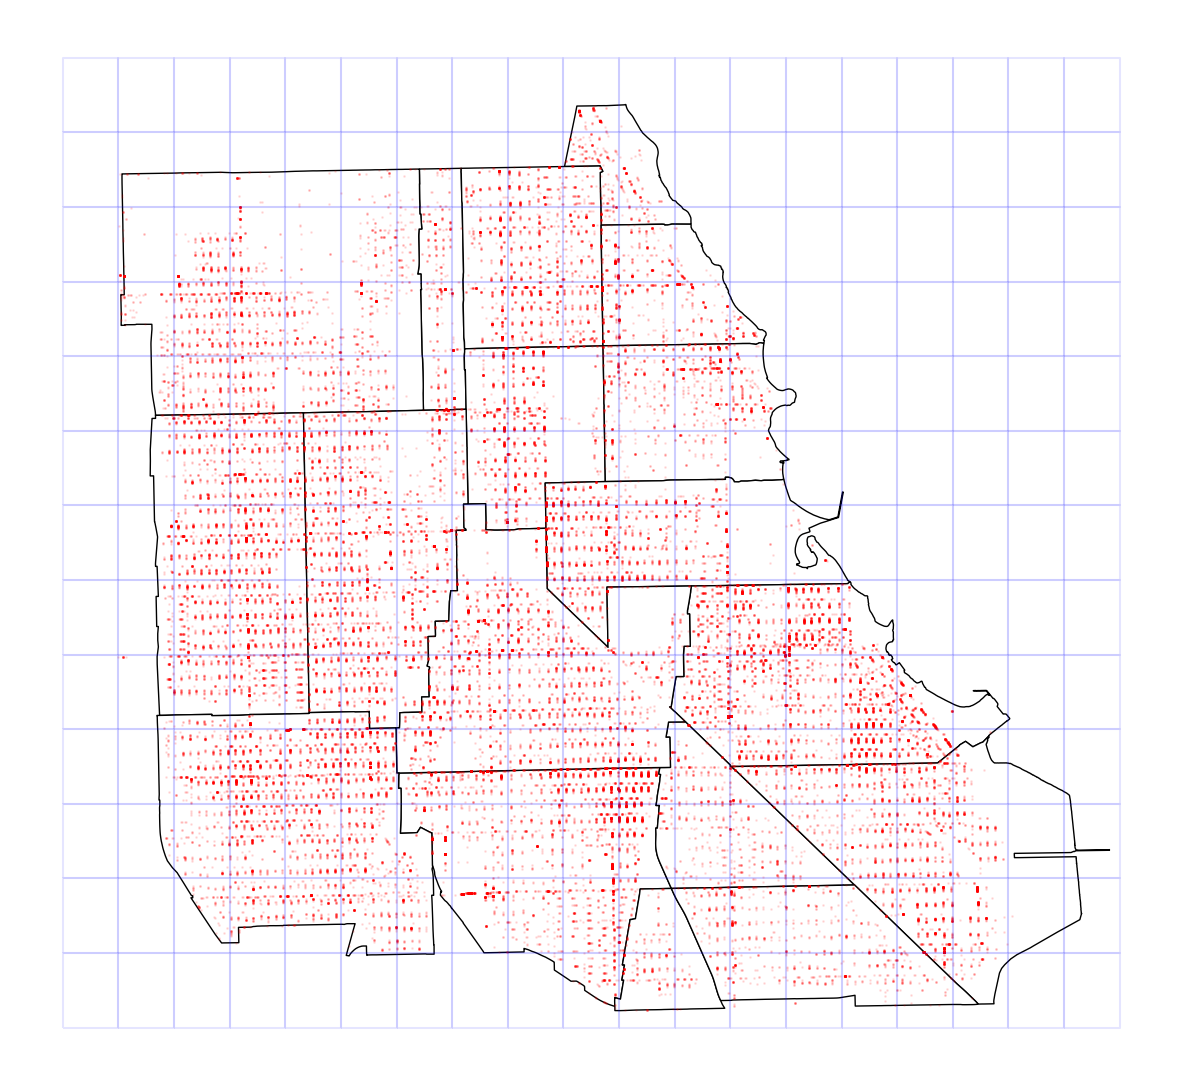

In [21]:
# Plot Computational Grid to check
fig, ax = plt.subplots(figsize=(15,15))
base = subset_df_communities.plot(color='white', edgecolor='black',ax=ax)
crimes_geo_subset.plot(markersize=1, ax=base,alpha=0.1, color='red')
comp_grid.boundary.plot(edgecolor='blue', ax=base, alpha=0.1)
ax.set_axis_off()

## Visualize inputs into the LGCP
- Aggregate data into grid squares

In [22]:
crimes_geo_subset.head()

Primary Type        Date  Community Areas   Latitude  Longitude  \
686       BATTERY  2019-10-13             42.0  41.777822 -87.614353   
868       BATTERY  2019-10-13             69.0  41.776038 -87.615520   
2037      BATTERY  2019-10-13             44.0  41.750895 -87.599111   
2168      BATTERY  2019-10-13             44.0  41.748664 -87.605165   
2748        THEFT  2019-10-13             71.0  41.754780 -87.657083   

                        geometry  
686   POINT (-87.61435 41.77782)  
868   POINT (-87.61552 41.77604)  
2037  POINT (-87.59911 41.75090)  
2168  POINT (-87.60516 41.74866)  
2748  POINT (-87.65708 41.75478)

In [23]:
comp_grid.head()

geometry  Cell_id
0  POLYGON ((-87.69381 41.72000, -87.69381 41.729...        0
1  POLYGON ((-87.69381 41.72900, -87.69381 41.738...        1
2  POLYGON ((-87.69381 41.73800, -87.69381 41.747...        2
3  POLYGON ((-87.69381 41.74700, -87.69381 41.756...        3
4  POLYGON ((-87.69381 41.75600, -87.69381 41.765...        4

Join Data to place each event into a computation grid

In [24]:
comp_grid_crime = gpd.sjoin(crimes_geo_subset, comp_grid, how='left', op='within')
comp_grid_crime['No Events'] = 1

/Users/tzehongti/miniforge3/envs/sta_571/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [25]:
comp_grid_crime = comp_grid_crime[comp_grid_crime['Cell_id'].isna()==False]

In [26]:
comp_grid_crime.head()

Primary Type        Date  Community Areas   Latitude  Longitude  \
686       BATTERY  2019-10-13             42.0  41.777822 -87.614353   
868       BATTERY  2019-10-13             69.0  41.776038 -87.615520   
2037      BATTERY  2019-10-13             44.0  41.750895 -87.599111   
2168      BATTERY  2019-10-13             44.0  41.748664 -87.605165   
2748        THEFT  2019-10-13             71.0  41.754780 -87.657083   

                        geometry  index_right  Cell_id  No Events  
686   POINT (-87.61435 41.77782)        110.0    110.0          1  
868   POINT (-87.61552 41.77604)        110.0    110.0          1  
2037  POINT (-87.59911 41.75090)        133.0    133.0          1  
2168  POINT (-87.60516 41.74866)        120.0    120.0          1  
2748  POINT (-87.65708 41.75478)         55.0     55.0          1

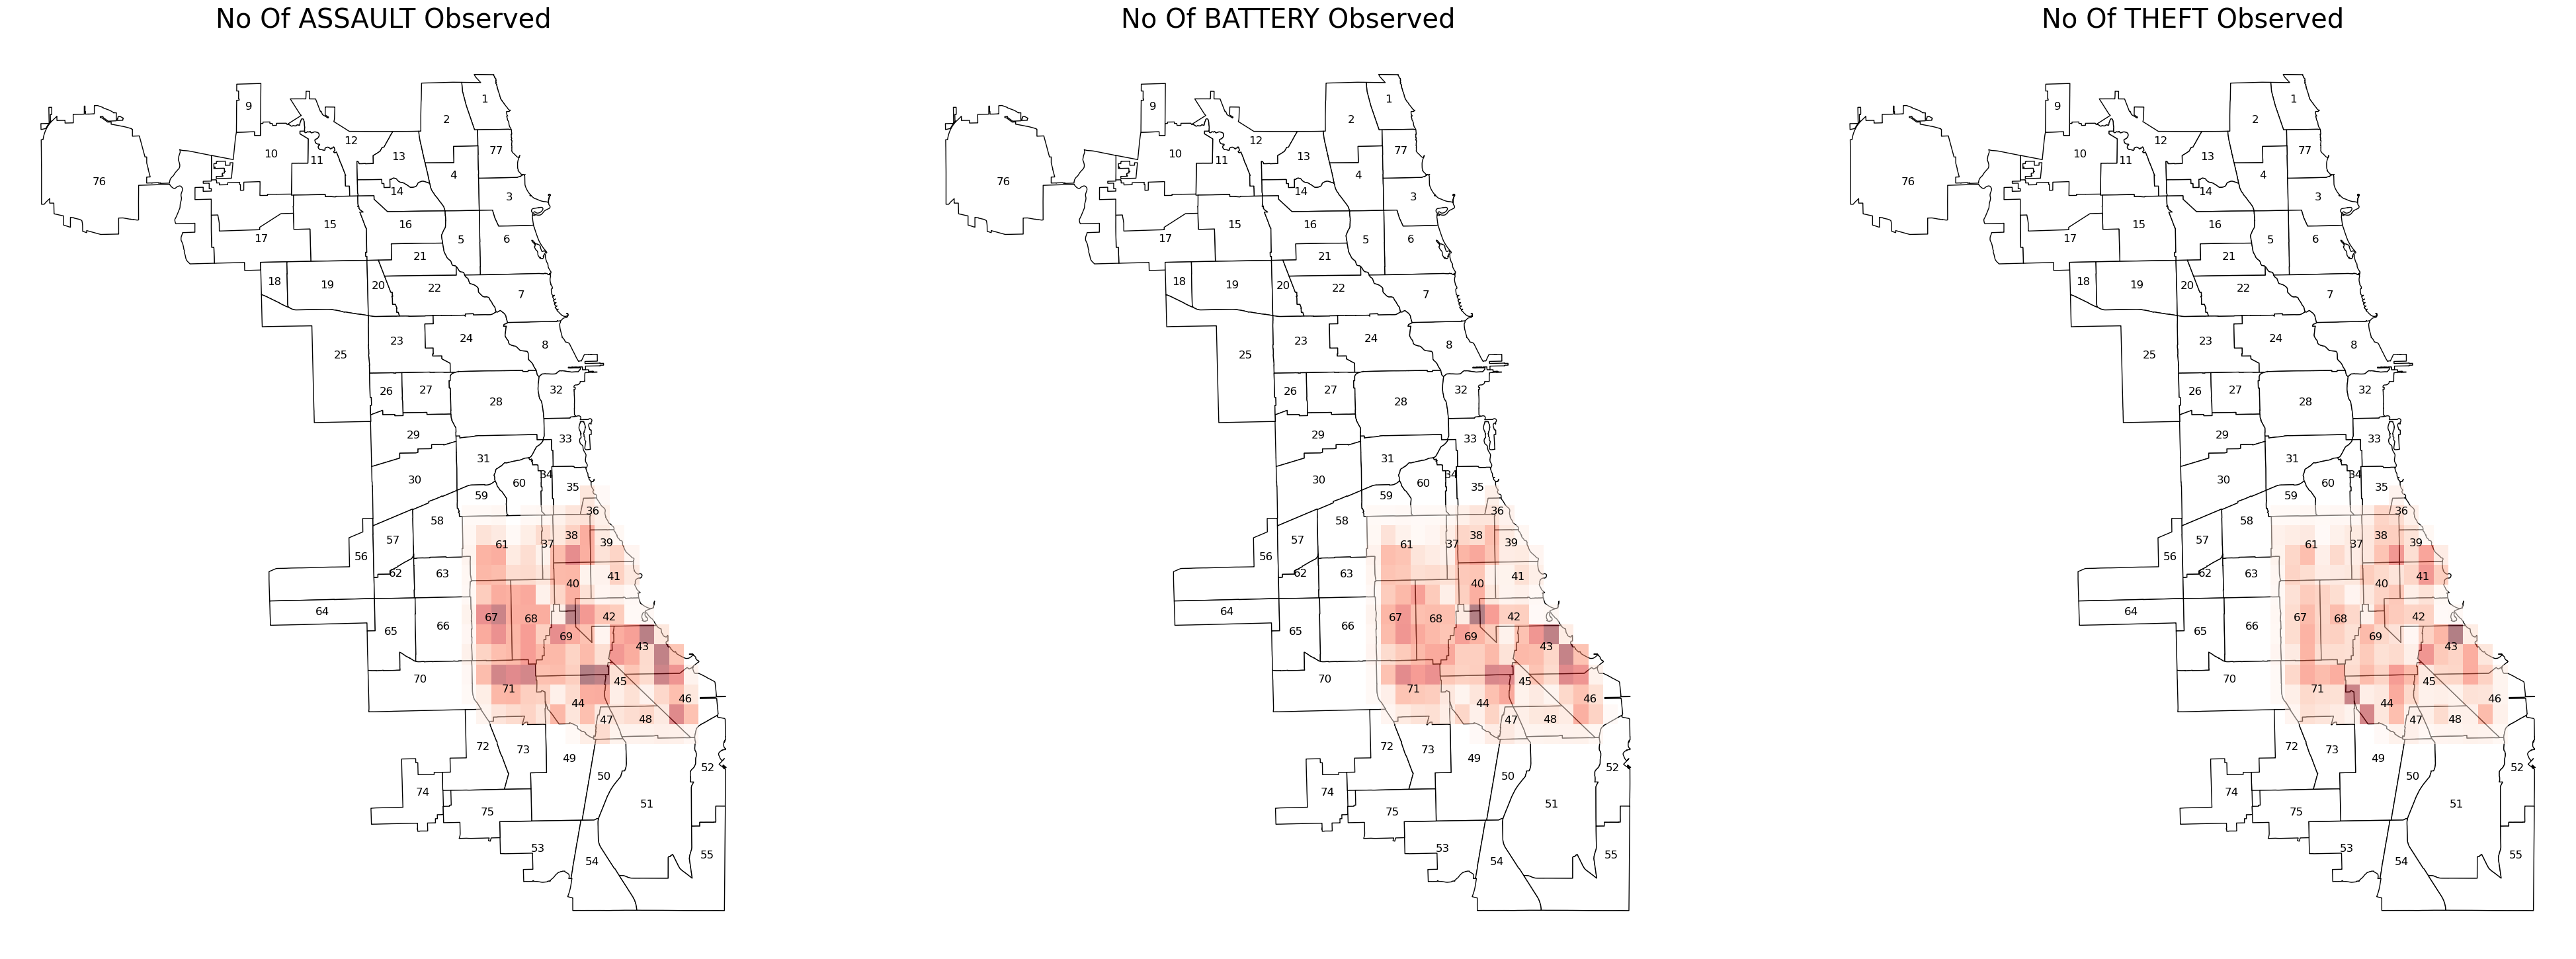

In [27]:
plot_aggregated_crime_grid(comp_grid_crime,
                           comp_grid,
                           df_communities)

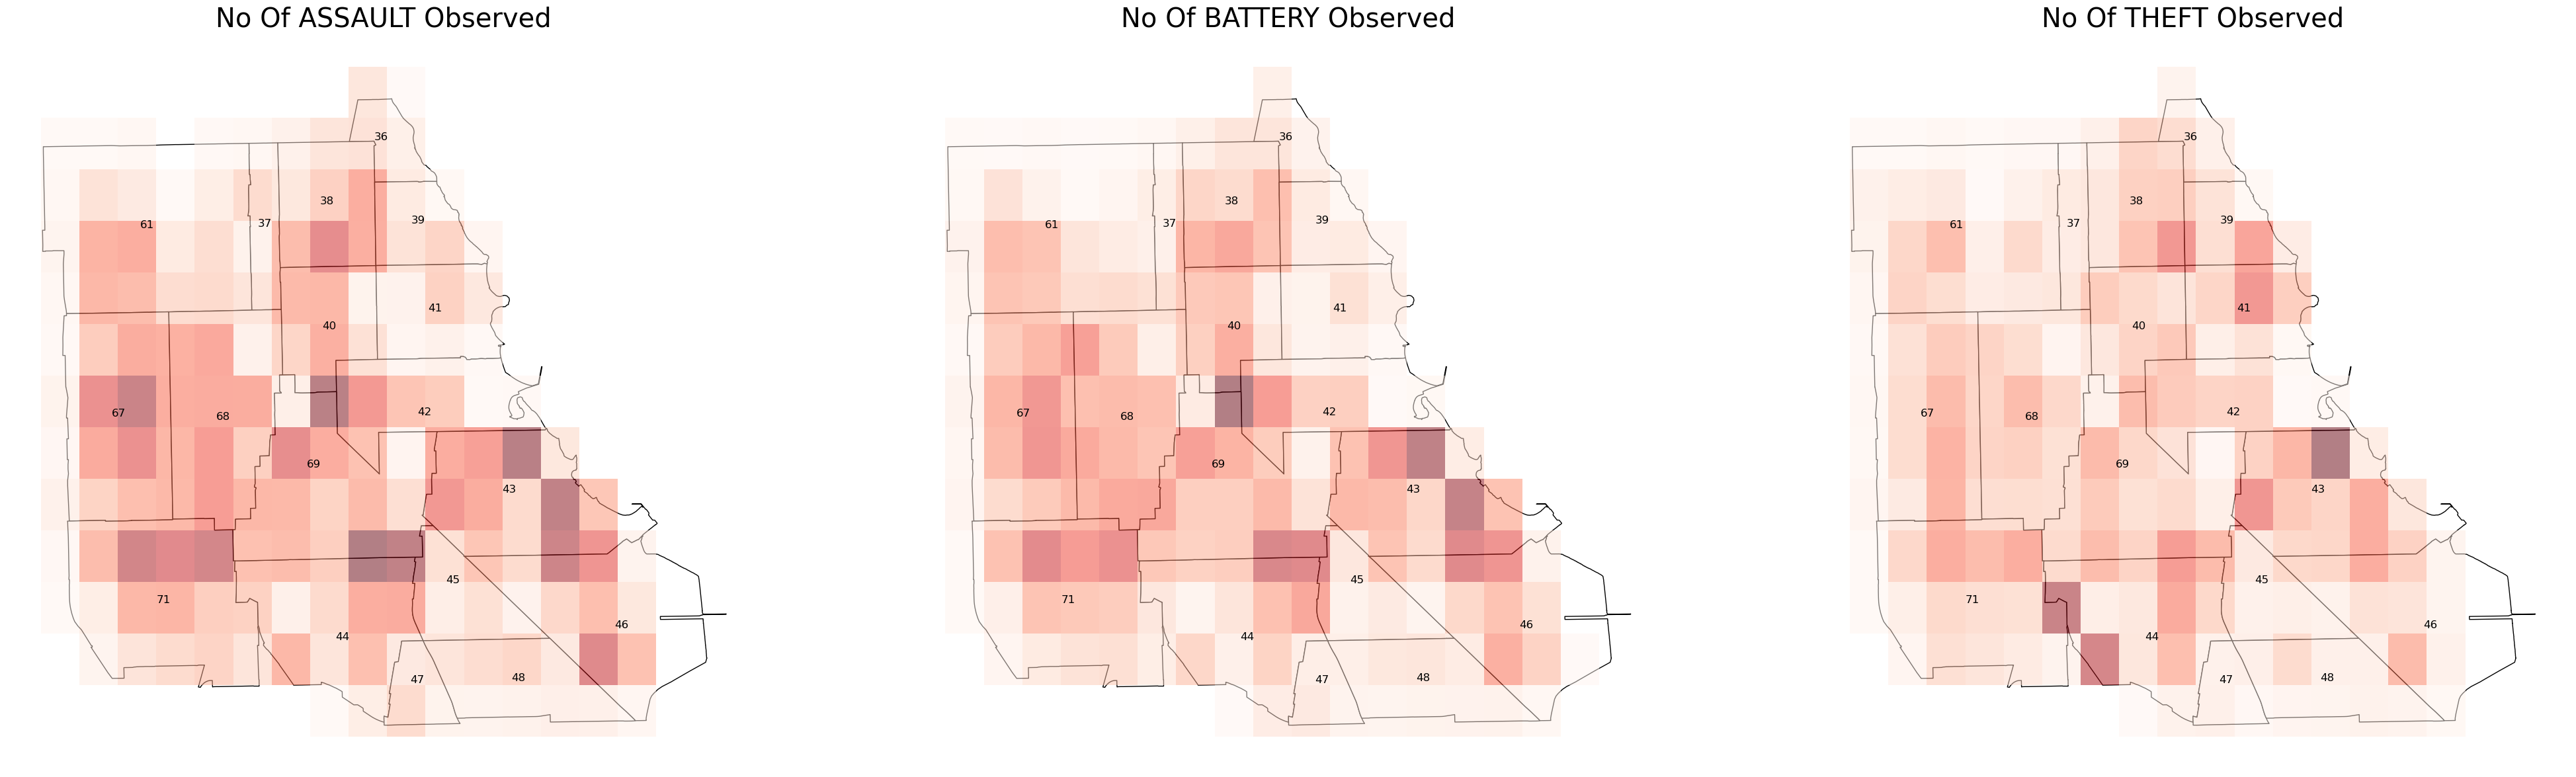

In [28]:
plot_aggregated_crime_grid(comp_grid_crime,
                           comp_grid,
                           subset_df_communities)

# Model

## First Step is to create the correct data structure for the model

In [29]:
comp_grid_crime['Time'] = process_dates(comp_grid_crime['Date'],4)

Pure Spatial Datasets

In [30]:
import pymc as pm

In [31]:
krs_assault, X_vars_asssault, cell_counts_assault = create_kron_struct_single(comp_grid_crime,
                                                           comp_grid,
                                                           crime_type='ASSAULT',
                                                           agg_vars=['Cell_id']
                                                           )

krs_battery, X_vars_battery, cell_counts_battery = create_kron_struct_single(comp_grid_crime,
                                                           comp_grid,
                                                           crime_type='BATTERY',
                                                           agg_vars=['Cell_id']
                                                           )

Spatial Temporal Datasets

In [32]:
krs_assault, X_vars_asssault_time, cell_counts_assault_time = create_kron_struct_single(comp_grid_crime,
                                                           comp_grid,
                                                           crime_type='ASSAULT',
                                                           agg_vars=['Cell_id','Time']
                                                           )


In [34]:
import pymc as pm
from model import LGCP_model

Pure Spatial Models

In [36]:
assault_model = LGCP_model(area_per_cell=6000, time=False)
battery_model = LGCP_model(area_per_cell=6000, time=False)

assault_model.init_model(X_vars_asssault, cell_counts_assault)
assault_model.sample_model()

battery_model.init_model(X_vars_battery, cell_counts_battery)
battery_model.sample_model()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, ls1, ls2, log_intensity_rotated_]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 548 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, ls1, ls2, log_intensity_rotated_]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 851 seconds.


Spatial Temporal Models

In [37]:
assault_spatiotemp_model = LGCP_model(area_per_cell=6000,time=True)

assault_spatiotemp_model.init_model(X_vars_asssault_time, cell_counts_assault_time)
assault_spatiotemp_model.sample_model(tune=1500,draws=1000)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, ls1, ls2, ls3, log_intensity_rotated_]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 1444 seconds.


In [38]:
import arviz as az

In [39]:
summary_data = az.summary(assault_spatiotemp_model.trace.posterior)

In [40]:
summary_data

mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
mu                         -9.205  0.159  -9.493   -8.909      0.002    0.002   
log_intensity_rotated_[0]  -1.635  0.791  -3.143   -0.260      0.008    0.007   
log_intensity_rotated_[1]  -1.061  0.906  -2.724    0.666      0.009    0.010   
log_intensity_rotated_[2]  -0.870  0.931  -2.600    0.864      0.009    0.012   
log_intensity_rotated_[3]  -0.788  0.933  -2.558    0.908      0.009    0.013   
...                           ...    ...     ...      ...        ...      ...   
log_intensity[1724]       -11.192  0.760 -12.583   -9.736      0.010    0.007   
log_intensity[1725]       -11.242  0.781 -12.728   -9.811      0.010    0.008   
log_intensity[1726]       -11.194  0.784 -12.690   -9.775      0.011    0.008   
log_intensity[1727]       -11.041  0.792 -12.457   -9.492      0.011    0.008   
log_intensity[1728]       -10.771  0.819 -12.354   -9.263      0.011    0.008   

                           ess_bulk  ess_tail  r_hat  
mu                           4936.0    3164.0    1.0  
log_intensity_rotated_[0]    9224.0    3068.0    1.0  
log_intensity_rotated_[1]   10954.0    3061.0    1.0  
log_intensity_rotated_[2]    9847.0    2622.0    1.0  
log_intensity_rotated_[3]   10550.0    2860.0    1.0  
...                             ...       ...    ...  
log_intensity[1724]          5383.0    3116.0    1.0  
log_intensity[1725]          5623.0    3040.0    1.0  
log_intensity[1726]          5391.0    3128.0    1.0  
log_intensity[1727]          5107.0    2450.0    1.0  
log_intensity[1728]          5367.0    2632.0    1.0  

[3462 rows x 9 columns]

### Predictive

In [41]:
#Keep original grid
pred_kron_lon = krs_assault['Lon'].unique()
pred_kron_lat = krs_assault['Lat'].unique()

# Impute new data
pred_kron_time = np.array([7,8])

# Sort for correctness
pred_kron_lon.sort()
pred_kron_lat.sort()
pred_kron_time.sort()

# Define grid
predictive_grid =  pm.math.cartesian(pred_kron_lon[:, None],
                                     pred_kron_lat[:, None],
                                     pred_kron_time[:, None])

In [42]:
with assault_spatiotemp_model.lgcp_model:
    f_pred = assault_spatiotemp_model.gp.conditional("f_pred1", predictive_grid)

    ppc = pm.sample_posterior_predictive(assault_spatiotemp_model.trace,
                                     var_names=["f_pred1"])

In [43]:
post_pred = ppc.posterior_predictive['f_pred1'].values

In [44]:
out_preds = np.exp(post_pred.reshape(-1, 494).mean(0)) * 6000

Plot spatiotemporal outcomes

In-Sample Values

In [45]:
out_samples_log_intense = np.array(assault_spatiotemp_model.trace.posterior['log_intensity'])

In [46]:
out_samples_log_intense = out_samples_log_intense.reshape(4000,-1)

In [47]:
krs_assault['Posterior_Intensity'] = np.exp(out_samples_log_intense.mean(0)) * 6000

In [48]:
krs_assault.head()

geometry  Cell_id  Time  \
0     POLYGON ((-87.69381 41.72000, -87.69381 41.729...        0     0   
494   POLYGON ((-87.69381 41.72000, -87.69381 41.729...        0     1   
1235  POLYGON ((-87.69381 41.72000, -87.69381 41.729...        0     2   
247   POLYGON ((-87.69381 41.72000, -87.69381 41.729...        0     3   
741   POLYGON ((-87.69381 41.72000, -87.69381 41.729...        0     4   

      No Events                         coords        Lon      Lat  \
0           0.0  (-87.68930752899999, 41.7245) -87.689308  41.7245   
494         0.0  (-87.68930752899999, 41.7245) -87.689308  41.7245   
1235        0.0  (-87.68930752899999, 41.7245) -87.689308  41.7245   
247         0.0  (-87.68930752899999, 41.7245) -87.689308  41.7245   
741         0.0  (-87.68930752899999, 41.7245) -87.689308  41.7245   

      Posterior_Intensity  
0                0.117345  
494              0.087381  
1235             0.073780  
247              0.069515  
741              0.073281

In [49]:
krs_assault['Time'].unique()

array([0, 1, 2, 3, 4, 5, 6])

# Plot Predictive

Reform Grid For Plotting

In [50]:
krs_assault.head()

geometry  Cell_id  Time  \
0     POLYGON ((-87.69381 41.72000, -87.69381 41.729...        0     0   
494   POLYGON ((-87.69381 41.72000, -87.69381 41.729...        0     1   
1235  POLYGON ((-87.69381 41.72000, -87.69381 41.729...        0     2   
247   POLYGON ((-87.69381 41.72000, -87.69381 41.729...        0     3   
741   POLYGON ((-87.69381 41.72000, -87.69381 41.729...        0     4   

      No Events                         coords        Lon      Lat  \
0           0.0  (-87.68930752899999, 41.7245) -87.689308  41.7245   
494         0.0  (-87.68930752899999, 41.7245) -87.689308  41.7245   
1235        0.0  (-87.68930752899999, 41.7245) -87.689308  41.7245   
247         0.0  (-87.68930752899999, 41.7245) -87.689308  41.7245   
741         0.0  (-87.68930752899999, 41.7245) -87.689308  41.7245   

      Posterior_Intensity  
0                0.117345  
494              0.087381  
1235             0.073780  
247              0.069515  
741              0.073281

In [51]:
coord_info = krs_assault[['Cell_id','geometry','Lat','Lon']].copy()
coord_info = coord_info.drop_duplicates()

In [52]:
predictive_grid_df = pd.DataFrame(predictive_grid)
predictive_grid_df.columns = ['Lon', 'Lat', 'Time']
predictive_grid_df['Posterior_Intensity'] = out_preds

# Add back geometry by appending cell ids
predictive_grid_df = predictive_grid_df.merge(coord_info, on=['Lon','Lat'],how='left')

# Convert to geopandas for plotting
predictive_grid_df = gpd.GeoDataFrame(predictive_grid_df)

In [53]:
predictive_grid_df

Lon      Lat  Time  Posterior_Intensity  Cell_id  \
0   -87.689308  41.7245   7.0             0.156738        0   
1   -87.689308  41.7245   8.0             0.228392        0   
2   -87.689308  41.7335   7.0             0.124684        1   
3   -87.689308  41.7335   8.0             0.187862        1   
4   -87.689308  41.7425   7.0             0.113810        2   
..         ...      ...   ...                  ...      ...   
489 -87.527308  41.8145   8.0             0.210581      244   
490 -87.527308  41.8235   7.0             0.140236      245   
491 -87.527308  41.8235   8.0             0.213199      245   
492 -87.527308  41.8325   7.0             0.180535      246   
493 -87.527308  41.8325   8.0             0.256029      246   

                                              geometry  
0    POLYGON ((-87.69381 41.72000, -87.69381 41.729...  
1    POLYGON ((-87.69381 41.72000, -87.69381 41.729...  
2    POLYGON ((-87.69381 41.72900, -87.69381 41.738...  
3    POLYGON ((-87.69381 41.72900, -87.69381 41.738...  
4    POLYGON ((-87.69381 41.73800, -87.69381 41.747...  
..                                                 ...  
489  POLYGON ((-87.53181 41.81000, -87.53181 41.819...  
490  POLYGON ((-87.53181 41.81900, -87.53181 41.828...  
491  POLYGON ((-87.53181 41.81900, -87.53181 41.828...  
492  POLYGON ((-87.53181 41.82800, -87.53181 41.837...  
493  POLYGON ((-87.53181 41.82800, -87.53181 41.837...  

[494 rows x 6 columns]

### Plot In-Sample and Out-Sample Fits

In [54]:
pred_times = [7,8]

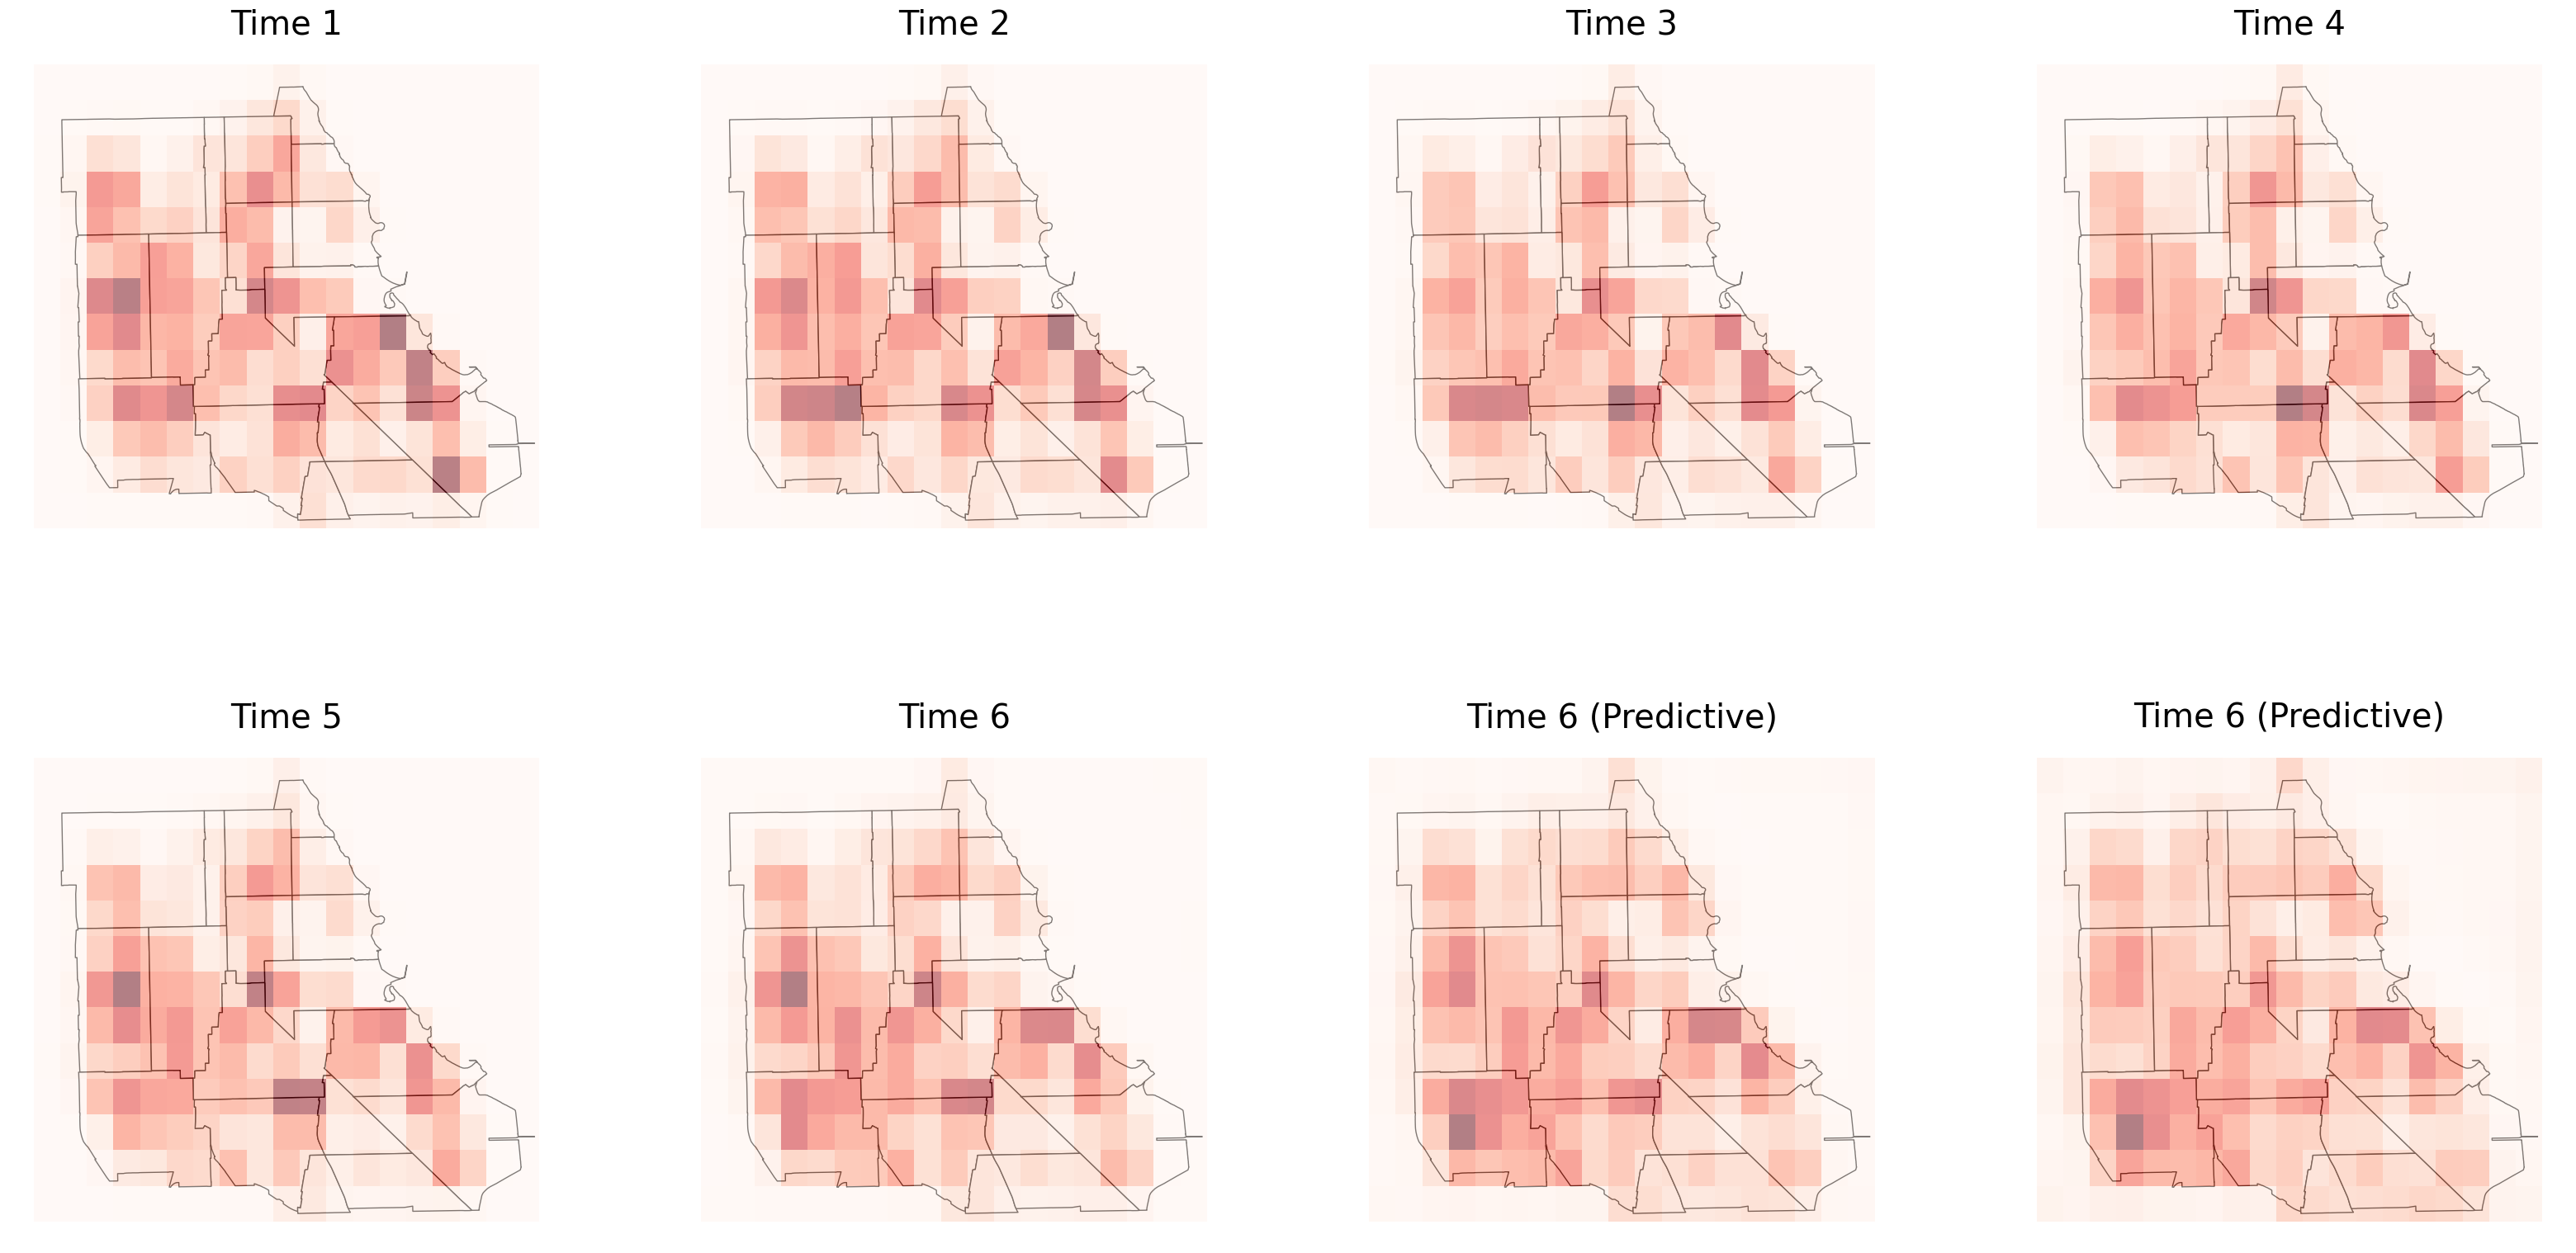

In [55]:
fig, ax = plt.subplots(2,4,figsize=(40,20))

coords = [(0,0),(0,1),(0,2),(0,3),(1,0),(1,1), (1,2), (1,3)]

for i,co in enumerate(coords[:-2]):

    time_slice = krs_assault[krs_assault['Time']==i+1]

    base = subset_df_communities.plot(color='white', edgecolor='black',ax=ax[co])

    time_slice.plot(column='Posterior_Intensity', ax=base,
                     cmap='Reds',legend=False,alpha=0.5);

    ax[co].set_axis_off()
    ax[co].title.set_text(f'Time {i+1}')

for t, co in zip(pred_times,coords[-2:]):
    time_slice = predictive_grid_df[predictive_grid_df['Time']==t]

    base = subset_df_communities.plot(color='white', edgecolor='black',ax=ax[co])

    time_slice.plot(column='Posterior_Intensity', ax=base,
                     cmap='Reds',legend=False,alpha=0.5);

    ax[co].set_axis_off()
    ax[co].title.set_text(f'Time {i+1} (Predictive)')

    